<a href="https://colab.research.google.com/github/tsenga2/keio-senga-seminar/blob/main/figure4_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [2]:
import pandas as pd

In [3]:
fileDownloaded = drive.CreateFile({'id': '11eQYM2wto2RBKI-gIQ3f-O6iCcgDBGUU'})
fileDownloaded.GetContentFile('figure4.csv')

In [4]:
df = pd.read_csv('figure4.csv',encoding = "cp932")
df.head()

,日経会社コード,企業名称,決算期,決算種別,連結基準,<貸借対照表（負債）>短期借入金・社債合計,<貸借対照表（負債）>長期借入金・社債・転換社債,<貸借対照表（資産）>現金・預金／現金及び現金同等物,<貸借対照表（資産）>資産合計
0,1,極洋,1984/10,10,1,43039.0,13666.0,16300.0,93094.0
1,1,極洋,1985/10,10,1,35854.0,10611.0,14433.0,82267.0
2,1,極洋,1986/10,10,1,33587.0,10385.0,13787.0,82394.0
3,1,極洋,1987/10,10,1,35390.0,10510.0,13887.0,85497.0
4,1,極洋,1988/03,10,1,37819.0,9895.0,14008.0,82382.0


In [5]:
%load_ext rpy2.ipython

In [6]:
%%R

library(tidyverse)

R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

R[write to console]: ✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [7]:
%%R

df <- read_csv('figure4.csv', locale = locale(encoding = "shift_jis"))
print(df)

Rows: 62595 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): 日経会社コード, 企業名称, 決算期
dbl (6): 決算種別, 連結基準, <貸借対照表（負債）>短期借入金・社債合計, <貸借対照表（負債）>長期借入金・社債・転換社債, <貸借対照表...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 62,595 × 9
   日経会社コード 企業名称 決算期  決算種別 連結基準 `<貸借対照表（負債）>短期…`
   <chr>          <chr>    <chr>      <dbl>    <dbl>                       <dbl>
 1 0000001        極洋     1984/10       10        1                       43039
 2 0000001        極洋     1985/10       10        1                       35854
 3 0000001        極洋     1986/10       10        1                       33587
 4 0000001        極洋     1987/10       10        1                       35390
 5 0000001        極洋     1988/03       10        1                       37819
 6 0000001        極洋     1989/03       10        1                     

In [8]:
%%R

sd <- df$`<貸借対照表（負債）>短期借入金・社債合計`
ld <- df$`<貸借対照表（負債）>長期借入金・社債・転換社債`
ca <- df$`<貸借対照表（資産）>現金・預金／現金及び現金同等物`
aa <- df$`<貸借対照表（資産）>資産合計`

In [9]:
%%R

dfm <- mutate(df, Blew = (sd + ld) / aa)
dfm.nona <- na.omit(dfm)
dft <- dfm.nona[order(dfm.nona$決算期,decreasing = FALSE),]

In [10]:
%%R

df1975 <- dft[dft$決算期>1975 & dft$決算期<1976, ]$Blew
df1976 <- dft[dft$決算期>1976 & dft$決算期<1977, ]$Blew
df1977 <- dft[dft$決算期>1977 & dft$決算期<1978, ]$Blew
df1978 <- dft[dft$決算期>1978 & dft$決算期<1979, ]$Blew
df1979 <- dft[dft$決算期>1979 & dft$決算期<1980, ]$Blew
df1980 <- dft[dft$決算期>1980 & dft$決算期<1981, ]$Blew
df1981 <- dft[dft$決算期>1981 & dft$決算期<1982, ]$Blew
df1982 <- dft[dft$決算期>1982 & dft$決算期<1983, ]$Blew
df1983 <- dft[dft$決算期>1983 & dft$決算期<1984, ]$Blew
df1984 <- dft[dft$決算期>1984 & dft$決算期<1985, ]$Blew
df1985 <- dft[dft$決算期>1985 & dft$決算期<1986, ]$Blew
df1986 <- dft[dft$決算期>1986 & dft$決算期<1987, ]$Blew
df1987 <- dft[dft$決算期>1987 & dft$決算期<1988, ]$Blew
df1988 <- dft[dft$決算期>1988 & dft$決算期<1989, ]$Blew
df1989 <- dft[dft$決算期>1989 & dft$決算期<1990, ]$Blew
df1990 <- dft[dft$決算期>1990 & dft$決算期<1991, ]$Blew
df1991 <- dft[dft$決算期>1991 & dft$決算期<1992, ]$Blew
df1992 <- dft[dft$決算期>1992 & dft$決算期<1993, ]$Blew
df1993 <- dft[dft$決算期>1993 & dft$決算期<1994, ]$Blew
df1994 <- dft[dft$決算期>1994 & dft$決算期<1995, ]$Blew
df1995 <- dft[dft$決算期>1995 & dft$決算期<1996, ]$Blew
df1996 <- dft[dft$決算期>1996 & dft$決算期<1997, ]$Blew
df1997 <- dft[dft$決算期>1997 & dft$決算期<1998, ]$Blew
df1998 <- dft[dft$決算期>1998 & dft$決算期<1999, ]$Blew
df1999 <- dft[dft$決算期>1999 & dft$決算期<2000, ]$Blew
df2000 <- dft[dft$決算期>2000 & dft$決算期<2001, ]$Blew
df2001 <- dft[dft$決算期>2001 & dft$決算期<2002, ]$Blew
df2002 <- dft[dft$決算期>2002 & dft$決算期<2003, ]$Blew
df2003 <- dft[dft$決算期>2003 & dft$決算期<2004, ]$Blew
df2004 <- dft[dft$決算期>2004 & dft$決算期<2005, ]$Blew
df2005 <- dft[dft$決算期>2005 & dft$決算期<2006, ]$Blew
df2006 <- dft[dft$決算期>2006 & dft$決算期<2007, ]$Blew
df2007 <- dft[dft$決算期>2007 & dft$決算期<2008, ]$Blew
df2008 <- dft[dft$決算期>2008 & dft$決算期<2009, ]$Blew
df2009 <- dft[dft$決算期>2009 & dft$決算期<2010, ]$Blew
df2010 <- dft[dft$決算期>2010 & dft$決算期<2011, ]$Blew
df2011 <- dft[dft$決算期>2011 & dft$決算期<2012, ]$Blew
df2012 <- dft[dft$決算期>2012 & dft$決算期<2013, ]$Blew
df2013 <- dft[dft$決算期>2013 & dft$決算期<2014, ]$Blew
df2014 <- dft[dft$決算期>2014 & dft$決算期<2015, ]$Blew
df2015 <- dft[dft$決算期>2015 & dft$決算期<2016, ]$Blew
df2016 <- dft[dft$決算期>2016 & dft$決算期<2017, ]$Blew
df2017 <- dft[dft$決算期>2017 & dft$決算期<2018, ]$Blew
df2018 <- dft[dft$決算期>2018 & dft$決算期<2019, ]$Blew
df2019 <- dft[dft$決算期>2019 & dft$決算期<2020, ]$Blew
df2020 <- dft[dft$決算期>2020 & dft$決算期<2021, ]$Blew
df2021 <- dft[dft$決算期>2021 & dft$決算期<2022, ]$Blew

In [11]:
%%R

e75 <- mean(df1975)
e76 <- mean(df1976)
e77 <- mean(df1977)
e78 <- mean(df1978)
e79 <- mean(df1979)
e80 <- mean(df1980)
e81 <- mean(df1981)
e82 <- mean(df1982)
e83 <- mean(df1983)
e84 <- mean(df1984)
e85 <- mean(df1985)
e86 <- mean(df1986)
e87 <- mean(df1987)
e88 <- mean(df1988)
e89 <- mean(df1989)
e90 <- mean(df1990)
e91 <- mean(df1991)
e92 <- mean(df1992)
e93 <- mean(df1993)
e94 <- mean(df1994)
e95 <- mean(df1995)
e96 <- mean(df1996)
e97 <- mean(df1997)
e98 <- mean(df1998)
e99 <- mean(df1999)
e00 <- mean(df2000)
e01 <- mean(df2001)
e02 <- mean(df2002)
e03 <- mean(df2003)
e04 <- mean(df2004)
e05 <- mean(df2005)
e06 <- mean(df2006)
e07 <- mean(df2007)
e08 <- mean(df2008)
e09 <- mean(df2009)
e10 <- mean(df2010)
e11 <- mean(df2011)
e12 <- mean(df2012)
e13 <- mean(df2013)
e14 <- mean(df2014)
e15 <- mean(df2015)
e16 <- mean(df2016)
e17 <- mean(df2017)
e18 <- mean(df2018)
e19 <- mean(df2019)
e20 <- mean(df2020)
e21 <- mean(df2021)

In [12]:
%%R

year <- 1975:2021
Book_levarage_ew <- c(e75,e76,e77,e78,e79,e80,e81,e82,e83,e84,e85,e86,e87,e88,e89,e90,e91,e92,e93,e94,e95,e96,e97,e98,e99,e00,e01,e02,e03,e04,e05,e06,e07,e08,e09,e10,e11,e12,e13,e14,e15,e16,e17,e18,e19,e20,e21)

In [13]:
%%R

dfdebt <- mutate(df, debt = sd + ld)
dfdebt.nona <- na.omit(dfdebt)
dfta <- dfdebt.nona[order(dfdebt.nona$決算期,decreasing = FALSE),]

In [14]:
%%R

df1975a <- dfta[dfta$決算期>1975 & dfta$決算期<1976, ][c("debt","<貸借対照表（資産）>資産合計")]
df1976a <- dfta[dfta$決算期>1976 & dfta$決算期<1977, ][c("debt","<貸借対照表（資産）>資産合計")]
df1977a <- dfta[dfta$決算期>1977 & dfta$決算期<1978, ][c("debt","<貸借対照表（資産）>資産合計")]
df1978a <- dfta[dfta$決算期>1978 & dfta$決算期<1979, ][c("debt","<貸借対照表（資産）>資産合計")]
df1979a <- dfta[dfta$決算期>1979 & dfta$決算期<1980, ][c("debt","<貸借対照表（資産）>資産合計")]
df1980a <- dfta[dfta$決算期>1980 & dfta$決算期<1981, ][c("debt","<貸借対照表（資産）>資産合計")]
df1981a <- dfta[dfta$決算期>1981 & dfta$決算期<1982, ][c("debt","<貸借対照表（資産）>資産合計")]
df1982a <- dfta[dfta$決算期>1982 & dfta$決算期<1983, ][c("debt","<貸借対照表（資産）>資産合計")]
df1983a <- dfta[dfta$決算期>1983 & dfta$決算期<1984, ][c("debt","<貸借対照表（資産）>資産合計")]
df1984a <- dfta[dfta$決算期>1984 & dfta$決算期<1985, ][c("debt","<貸借対照表（資産）>資産合計")]
df1985a <- dfta[dfta$決算期>1985 & dfta$決算期<1986, ][c("debt","<貸借対照表（資産）>資産合計")]
df1986a <- dfta[dfta$決算期>1986 & dfta$決算期<1987, ][c("debt","<貸借対照表（資産）>資産合計")]
df1987a <- dfta[dfta$決算期>1987 & dfta$決算期<1988, ][c("debt","<貸借対照表（資産）>資産合計")]
df1988a <- dfta[dfta$決算期>1988 & dfta$決算期<1989, ][c("debt","<貸借対照表（資産）>資産合計")]
df1989a <- dfta[dfta$決算期>1989 & dfta$決算期<1990, ][c("debt","<貸借対照表（資産）>資産合計")]
df1990a <- dfta[dfta$決算期>1990 & dfta$決算期<1991, ][c("debt","<貸借対照表（資産）>資産合計")]
df1991a <- dfta[dfta$決算期>1991 & dfta$決算期<1992, ][c("debt","<貸借対照表（資産）>資産合計")]
df1992a <- dfta[dfta$決算期>1992 & dfta$決算期<1993, ][c("debt","<貸借対照表（資産）>資産合計")]
df1993a <- dfta[dfta$決算期>1993 & dfta$決算期<1994, ][c("debt","<貸借対照表（資産）>資産合計")]
df1994a <- dfta[dfta$決算期>1994 & dfta$決算期<1995, ][c("debt","<貸借対照表（資産）>資産合計")]
df1995a <- dfta[dfta$決算期>1995 & dfta$決算期<1996, ][c("debt","<貸借対照表（資産）>資産合計")]
df1996a <- dfta[dfta$決算期>1996 & dfta$決算期<1997, ][c("debt","<貸借対照表（資産）>資産合計")]
df1997a <- dfta[dfta$決算期>1997 & dfta$決算期<1998, ][c("debt","<貸借対照表（資産）>資産合計")]
df1998a <- dfta[dfta$決算期>1998 & dfta$決算期<1999, ][c("debt","<貸借対照表（資産）>資産合計")]
df1999a <- dfta[dfta$決算期>1999 & dfta$決算期<2000, ][c("debt","<貸借対照表（資産）>資産合計")]
df2000a <- dfta[dfta$決算期>2000 & dfta$決算期<2001, ][c("debt","<貸借対照表（資産）>資産合計")]
df2001a <- dfta[dfta$決算期>2001 & dfta$決算期<2002, ][c("debt","<貸借対照表（資産）>資産合計")]
df2002a <- dfta[dfta$決算期>2002 & dfta$決算期<2003, ][c("debt","<貸借対照表（資産）>資産合計")]
df2003a <- dfta[dfta$決算期>2003 & dfta$決算期<2004, ][c("debt","<貸借対照表（資産）>資産合計")]
df2004a <- dfta[dfta$決算期>2004 & dfta$決算期<2005, ][c("debt","<貸借対照表（資産）>資産合計")]
df2005a <- dfta[dfta$決算期>2005 & dfta$決算期<2006, ][c("debt","<貸借対照表（資産）>資産合計")]
df2006a <- dfta[dfta$決算期>2006 & dfta$決算期<2007, ][c("debt","<貸借対照表（資産）>資産合計")]
df2007a <- dfta[dfta$決算期>2007 & dfta$決算期<2008, ][c("debt","<貸借対照表（資産）>資産合計")]
df2008a <- dfta[dfta$決算期>2008 & dfta$決算期<2009, ][c("debt","<貸借対照表（資産）>資産合計")]
df2009a <- dfta[dfta$決算期>2009 & dfta$決算期<2010, ][c("debt","<貸借対照表（資産）>資産合計")]
df2010a <- dfta[dfta$決算期>2010 & dfta$決算期<2011, ][c("debt","<貸借対照表（資産）>資産合計")]
df2011a <- dfta[dfta$決算期>2011 & dfta$決算期<2012, ][c("debt","<貸借対照表（資産）>資産合計")]
df2012a <- dfta[dfta$決算期>2012 & dfta$決算期<2013, ][c("debt","<貸借対照表（資産）>資産合計")]
df2013a <- dfta[dfta$決算期>2013 & dfta$決算期<2014, ][c("debt","<貸借対照表（資産）>資産合計")]
df2014a <- dfta[dfta$決算期>2014 & dfta$決算期<2015, ][c("debt","<貸借対照表（資産）>資産合計")]
df2015a <- dfta[dfta$決算期>2015 & dfta$決算期<2016, ][c("debt","<貸借対照表（資産）>資産合計")]
df2016a <- dfta[dfta$決算期>2016 & dfta$決算期<2017, ][c("debt","<貸借対照表（資産）>資産合計")]
df2017a <- dfta[dfta$決算期>2017 & dfta$決算期<2018, ][c("debt","<貸借対照表（資産）>資産合計")]
df2018a <- dfta[dfta$決算期>2018 & dfta$決算期<2019, ][c("debt","<貸借対照表（資産）>資産合計")]
df2019a <- dfta[dfta$決算期>2019 & dfta$決算期<2020, ][c("debt","<貸借対照表（資産）>資産合計")]
df2020a <- dfta[dfta$決算期>2020 & dfta$決算期<2021, ][c("debt","<貸借対照表（資産）>資産合計")]
df2021a <- dfta[dfta$決算期>2021 & dfta$決算期<2022, ][c("debt","<貸借対照表（資産）>資産合計")]

In [15]:
%%R

a75 <- sum(df1975a$debt)/sum(df1975a$`<貸借対照表（資産）>資産合計`)
a76 <- sum(df1976a$debt)/sum(df1976a$`<貸借対照表（資産）>資産合計`)
a77 <- sum(df1977a$debt)/sum(df1977a$`<貸借対照表（資産）>資産合計`)
a78 <- sum(df1978a$debt)/sum(df1978a$`<貸借対照表（資産）>資産合計`)
a79 <- sum(df1979a$debt)/sum(df1979a$`<貸借対照表（資産）>資産合計`)
a80 <- sum(df1980a$debt)/sum(df1980a$`<貸借対照表（資産）>資産合計`)
a81 <- sum(df1981a$debt)/sum(df1981a$`<貸借対照表（資産）>資産合計`)
a82 <- sum(df1982a$debt)/sum(df1982a$`<貸借対照表（資産）>資産合計`)
a83 <- sum(df1983a$debt)/sum(df1983a$`<貸借対照表（資産）>資産合計`)
a84 <- sum(df1984a$debt)/sum(df1984a$`<貸借対照表（資産）>資産合計`)
a85 <- sum(df1985a$debt)/sum(df1985a$`<貸借対照表（資産）>資産合計`)
a86 <- sum(df1986a$debt)/sum(df1986a$`<貸借対照表（資産）>資産合計`)
a87 <- sum(df1987a$debt)/sum(df1987a$`<貸借対照表（資産）>資産合計`)
a88 <- sum(df1988a$debt)/sum(df1988a$`<貸借対照表（資産）>資産合計`)
a89 <- sum(df1989a$debt)/sum(df1989a$`<貸借対照表（資産）>資産合計`)
a90 <- sum(df1990a$debt)/sum(df1990a$`<貸借対照表（資産）>資産合計`)
a91 <- sum(df1991a$debt)/sum(df1991a$`<貸借対照表（資産）>資産合計`)
a92 <- sum(df1992a$debt)/sum(df1992a$`<貸借対照表（資産）>資産合計`)
a93 <- sum(df1993a$debt)/sum(df1993a$`<貸借対照表（資産）>資産合計`)
a94 <- sum(df1994a$debt)/sum(df1994a$`<貸借対照表（資産）>資産合計`)
a95 <- sum(df1995a$debt)/sum(df1995a$`<貸借対照表（資産）>資産合計`)
a96 <- sum(df1996a$debt)/sum(df1996a$`<貸借対照表（資産）>資産合計`)
a97 <- sum(df1997a$debt)/sum(df1997a$`<貸借対照表（資産）>資産合計`)
a98 <- sum(df1998a$debt)/sum(df1998a$`<貸借対照表（資産）>資産合計`)
a99 <- sum(df1999a$debt)/sum(df1999a$`<貸借対照表（資産）>資産合計`)
a00 <- sum(df2000a$debt)/sum(df2000a$`<貸借対照表（資産）>資産合計`)
a01 <- sum(df2001a$debt)/sum(df2001a$`<貸借対照表（資産）>資産合計`)
a02 <- sum(df2002a$debt)/sum(df2002a$`<貸借対照表（資産）>資産合計`)
a03 <- sum(df2003a$debt)/sum(df2003a$`<貸借対照表（資産）>資産合計`)
a04 <- sum(df2004a$debt)/sum(df2004a$`<貸借対照表（資産）>資産合計`)
a05 <- sum(df2005a$debt)/sum(df2005a$`<貸借対照表（資産）>資産合計`)
a06 <- sum(df2006a$debt)/sum(df2006a$`<貸借対照表（資産）>資産合計`)
a07 <- sum(df2007a$debt)/sum(df2007a$`<貸借対照表（資産）>資産合計`)
a08 <- sum(df2008a$debt)/sum(df2008a$`<貸借対照表（資産）>資産合計`)
a09 <- sum(df2009a$debt)/sum(df2009a$`<貸借対照表（資産）>資産合計`)
a10 <- sum(df2010a$debt)/sum(df2010a$`<貸借対照表（資産）>資産合計`)
a11 <- sum(df2011a$debt)/sum(df2011a$`<貸借対照表（資産）>資産合計`)
a12 <- sum(df2012a$debt)/sum(df2012a$`<貸借対照表（資産）>資産合計`)
a13 <- sum(df2013a$debt)/sum(df2013a$`<貸借対照表（資産）>資産合計`)
a14 <- sum(df2014a$debt)/sum(df2014a$`<貸借対照表（資産）>資産合計`)
a15 <- sum(df2015a$debt)/sum(df2015a$`<貸借対照表（資産）>資産合計`)
a16 <- sum(df2016a$debt)/sum(df2016a$`<貸借対照表（資産）>資産合計`)
a17 <- sum(df2017a$debt)/sum(df2017a$`<貸借対照表（資産）>資産合計`)
a18 <- sum(df2018a$debt)/sum(df2018a$`<貸借対照表（資産）>資産合計`)
a19 <- sum(df2019a$debt)/sum(df2019a$`<貸借対照表（資産）>資産合計`)
a20 <- sum(df2020a$debt)/sum(df2020a$`<貸借対照表（資産）>資産合計`)
a21 <- sum(df2021a$debt)/sum(df2021a$`<貸借対照表（資産）>資産合計`)

In [16]:
%%R

year <- 1975:2021
Book_levarage_aw <- c(a75,a76,a77,a78,a79,a80,a81,a82,a83,a84,a85,a86,a87,a88,a89,a90,a91,a92,a93,a94,a95,a96,a97,a98,a99,a00,a01,a02,a03,a04,a05,a06,a07,a08,a09,a10,a11,a12,a13,a14,a15,a16,a17,a18,a19,a20,a21)

In [17]:
%%R

dfnet <- mutate(df, Nlew = (sd + ld - ca) / aa)
dfnet.nona <- na.omit(dfnet)
dftn <- dfnet.nona[order(dfnet.nona$決算期,decreasing = FALSE),]

In [18]:
%%R

df1975n <- dftn[dftn$決算期>1975 & dftn$決算期<1976, ]$Nlew
df1976n <- dftn[dftn$決算期>1976 & dftn$決算期<1977, ]$Nlew
df1977n <- dftn[dftn$決算期>1977 & dftn$決算期<1978, ]$Nlew
df1978n <- dftn[dftn$決算期>1978 & dftn$決算期<1979, ]$Nlew
df1979n <- dftn[dftn$決算期>1979 & dftn$決算期<1980, ]$Nlew
df1980n <- dftn[dftn$決算期>1980 & dftn$決算期<1981, ]$Nlew
df1981n <- dftn[dftn$決算期>1981 & dftn$決算期<1982, ]$Nlew
df1982n <- dftn[dftn$決算期>1982 & dftn$決算期<1983, ]$Nlew
df1983n <- dftn[dftn$決算期>1983 & dftn$決算期<1984, ]$Nlew
df1984n <- dftn[dftn$決算期>1984 & dftn$決算期<1985, ]$Nlew
df1985n <- dftn[dftn$決算期>1985 & dftn$決算期<1986, ]$Nlew
df1986n <- dftn[dftn$決算期>1986 & dftn$決算期<1987, ]$Nlew
df1987n <- dftn[dftn$決算期>1987 & dftn$決算期<1988, ]$Nlew
df1988n <- dftn[dftn$決算期>1988 & dftn$決算期<1989, ]$Nlew
df1989n <- dftn[dftn$決算期>1989 & dftn$決算期<1990, ]$Nlew
df1990n <- dftn[dftn$決算期>1990 & dftn$決算期<1991, ]$Nlew
df1991n <- dftn[dftn$決算期>1991 & dftn$決算期<1992, ]$Nlew
df1992n <- dftn[dftn$決算期>1992 & dftn$決算期<1993, ]$Nlew
df1993n <- dftn[dftn$決算期>1993 & dftn$決算期<1994, ]$Nlew
df1994n <- dftn[dftn$決算期>1994 & dftn$決算期<1995, ]$Nlew
df1995n <- dftn[dftn$決算期>1995 & dftn$決算期<1996, ]$Nlew
df1996n <- dftn[dftn$決算期>1996 & dftn$決算期<1997, ]$Nlew
df1997n <- dftn[dftn$決算期>1997 & dftn$決算期<1998, ]$Nlew
df1998n <- dftn[dftn$決算期>1998 & dftn$決算期<1999, ]$Nlew
df1999n <- dftn[dftn$決算期>1999 & dftn$決算期<2000, ]$Nlew
df2000n <- dftn[dftn$決算期>2000 & dftn$決算期<2001, ]$Nlew
df2001n <- dftn[dftn$決算期>2001 & dftn$決算期<2002, ]$Nlew
df2002n <- dftn[dftn$決算期>2002 & dftn$決算期<2003, ]$Nlew
df2003n <- dftn[dftn$決算期>2003 & dftn$決算期<2004, ]$Nlew
df2004n <- dftn[dftn$決算期>2004 & dftn$決算期<2005, ]$Nlew
df2005n <- dftn[dftn$決算期>2005 & dftn$決算期<2006, ]$Nlew
df2006n <- dftn[dftn$決算期>2006 & dftn$決算期<2007, ]$Nlew
df2007n <- dftn[dftn$決算期>2007 & dftn$決算期<2008, ]$Nlew
df2008n <- dftn[dftn$決算期>2008 & dftn$決算期<2009, ]$Nlew
df2009n <- dftn[dftn$決算期>2009 & dftn$決算期<2010, ]$Nlew
df2010n <- dftn[dftn$決算期>2010 & dftn$決算期<2011, ]$Nlew
df2011n <- dftn[dftn$決算期>2011 & dftn$決算期<2012, ]$Nlew
df2012n <- dftn[dftn$決算期>2012 & dftn$決算期<2013, ]$Nlew
df2013n <- dftn[dftn$決算期>2013 & dftn$決算期<2014, ]$Nlew
df2014n <- dftn[dftn$決算期>2014 & dftn$決算期<2015, ]$Nlew
df2015n <- dftn[dftn$決算期>2015 & dftn$決算期<2016, ]$Nlew
df2016n <- dftn[dftn$決算期>2016 & dftn$決算期<2017, ]$Nlew
df2017n <- dftn[dftn$決算期>2017 & dftn$決算期<2018, ]$Nlew
df2018n <- dftn[dftn$決算期>2018 & dftn$決算期<2019, ]$Nlew
df2019n <- dftn[dftn$決算期>2019 & dftn$決算期<2020, ]$Nlew
df2020n <- dftn[dftn$決算期>2020 & dftn$決算期<2021, ]$Nlew
df2021n <- dftn[dftn$決算期>2021 & dftn$決算期<2022, ]$Nlew

In [19]:
%%R

n75 <- mean(df1975n)
n76 <- mean(df1976n)
n77 <- mean(df1977n)
n78 <- mean(df1978n)
n79 <- mean(df1979n)
n80 <- mean(df1980n)
n81 <- mean(df1981n)
n82 <- mean(df1982n)
n83 <- mean(df1983n)
n84 <- mean(df1984n)
n85 <- mean(df1985n)
n86 <- mean(df1986n)
n87 <- mean(df1987n)
n88 <- mean(df1988n)
n89 <- mean(df1989n)
n90 <- mean(df1990n)
n91 <- mean(df1991n)
n92 <- mean(df1992n)
n93 <- mean(df1993n)
n94 <- mean(df1994n)
n95 <- mean(df1995n)
n96 <- mean(df1996n)
n97 <- mean(df1997n)
n98 <- mean(df1998n)
n99 <- mean(df1999n)
n00 <- mean(df2000n)
n01 <- mean(df2001n)
n02 <- mean(df2002n)
n03 <- mean(df2003n)
n04 <- mean(df2004n)
n05 <- mean(df2005n)
n06 <- mean(df2006n)
n07 <- mean(df2007n)
n08 <- mean(df2008n)
n09 <- mean(df2009n)
n10 <- mean(df2010n)
n11 <- mean(df2011n)
n12 <- mean(df2012n)
n13 <- mean(df2013n)
n14 <- mean(df2014n)
n15 <- mean(df2015n)
n16 <- mean(df2016n)
n17 <- mean(df2017n)
n18 <- mean(df2018n)
n19 <- mean(df2019n)
n20 <- mean(df2020n)
n21 <- mean(df2021n)

In [20]:
%%R

year <- 1975:2021
Net_levarage_ew <- c(n75,n76,n77,n78,n79,n80,n81,n82,n83,n84,n85,n86,n87,n88,n89,n90,n91,n92,n93,n94,n95,n96,n97,n98,n99,n00,n01,n02,n03,n04,n05,n06,n07,n08,n09,n10,n11,n12,n13,n14,n15,n16,n17,n18,n19,n20,n21)

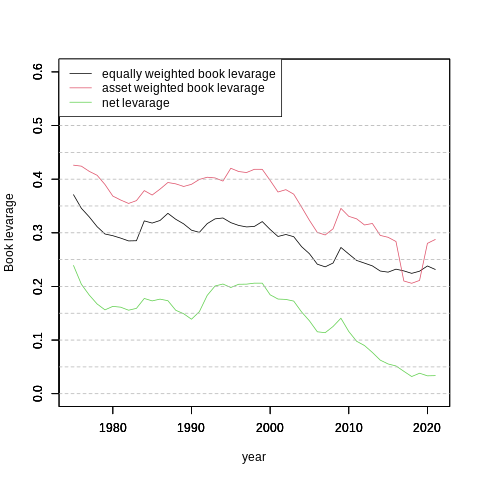

In [21]:
%%R

plot(year,Book_levarage_ew,type = "l",col = 1,xlim = c(1975,2021),ylim = c(0,0.6),xlab = "year",ylab = "Book levarage") 
par(new = T)
plot(year,Book_levarage_aw,type = "l", col = 2,xlim = c(1975,2021),ylim = c(0,0.6),ann = F) 
par(new = T)
plot(year,Net_levarage_ew,type = "l", col = 3,xlim = c(1975,2021),ylim = c(0,0.6),ann = F) 
abline(h = 0.00, lty = 2, col = grey(0.7))
abline(h = 0.05, lty = 2, col = grey(0.7))
abline(h = 0.10, lty = 2, col = grey(0.7))
abline(h = 0.15, lty = 2, col = grey(0.7))
abline(h = 0.20, lty = 2, col = grey(0.7))
abline(h = 0.25, lty = 2, col = grey(0.7))
abline(h = 0.30, lty = 2, col = grey(0.7))
abline(h = 0.35, lty = 2, col = grey(0.7))
abline(h = 0.40, lty = 2, col = grey(0.7))
abline(h = 0.45, lty = 2, col = grey(0.7))
abline(h = 0.50, lty = 2, col = grey(0.7))
legend("topleft", legend=c("equally weighted book levarage", "asset weighted book levarage","net levarage"), lty = 1, col = 1:2:3)


Equally weighted book levarage, Asset weighted book levarage はそれぞれ、（長期借入金・社債・転換社債＋短期借入金・社債合計）を資産合計で割ったものの加重平均，資産加重平均

Net levarage は、分子から 現金・預金／現金及び現金同等物 を引いたものの加重平均